<a href="https://colab.research.google.com/github/tbonne/peds/blob/main/docs/introViz/introViz2_densityPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1C2o3BW9_N9LkeIi2lM4viUwvXK75G6Nc'>

***

## <font color='darkorange'>Density plots and normal distributions</font>

In this exercise we will start to use density plots.

### <font color='darkorange'>Normal distribution</font>

Let's start by simulating some data from a normal distribution.

In [ ]:
# import the libraries we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Let's choose a mean and std and simulate some data from a normal distribution. Here we use the method np.random.normal(mean,std, size) to simulate data.

In [ ]:
#choose a mean and a standard deviation
my_mean= 2
my_std = 10

#sample data from a normal distribution
my_made_up_data = np.random.normal(my_mean, my_std, size=1000)

#take a look the data you made
my_made_up_data[0:10]

Let's take a look at the data

In [ ]:
#plot a histogram
sns.displot(my_made_up_data)

Given you know the 'real' mean and std how well can you estimate them? Use the code above to get the mean and sd from your sample.

In [ ]:
#get the mean
estimated_mean = my_made_up_data.mean()

#get the sd
estimated_std = my_made_up_data.std()

#print 
print("The estimated mean is ",estimated_mean)
print("The estimated mean is ",estimated_std)

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'center'>  

  
How well can you estimate the true mean from the sample? Try playing around with the size of the sample, the mean, and the std. Can you generate samples where the estimated mean is way off? 

Share plots to Slack, let's see who can get the biggest difference!

In [ ]:
print("The true mean is {0} compared to the estimated mean {1}".format(my_mean, estimated_mean.round(3)))
print("The true sd is {0} compared to the estimated sd {1}".format(my_std, estimated_std.round(3)))


Use a histogram to compare how close your estimates are

In [ ]:
#plot the histogram again and place the estimated mean on the plot
sns.displot(my_made_up_data)
plt.axvline(estimated_mean,color="black")
plt.axvline(my_mean,color="red")

#save a plot
plt.savefig('hist_compare.png')

### <font color='darkorange'>Density plots</font>

Let's take a look at density plots next. These plots are like the histogram, but instead of counts on the y-axis we now have densities. Values that are found a lot have high densities, whereas values that are rare have low densities. Let's take a look! 

In [ ]:
#bring in the nyc flight data
df_flights = pd.read_csv('/content/nyc_flight_data.csv')

#fit a histogram of departure delay times
sns.displot(df_flights,x='arr_delay', binwidth=10)

In [ ]:
#plot one with both histogram and density 
sns.displot(df_flights, x='arr_delay', kde=True)

In [ ]:
#plot just density
sns.displot(df_flights, x='arr_delay', kind='kde')

How does this distribution compare to the normal distributions 'bell shaped' curve? Do you see any similarities/differences?

### <font color='darkorange'>Distributions within categories</font>


We can also start to look at these distributions for different groups. So in this case we can look at distributions within carriers using the *hue* input.

In [ ]:
#Create a density plot for each carrier
sns.displot(df_flights, x='arr_delay', kind='kde', hue='carrier', fill=False).set(xlabel='Arrival delay')
plt.savefig('overlapDens.png', dpi=600)

This helps see that they are mostly centered around 0 minutes delay. Are there better ways to vizualize this to see the differences between carriers?

#### Let's try a **violin plot**

In [ ]:
#plot a violin plot
sns.violinplot(data=df_flights, x='carrier',y='arr_delay')
plt.axhline(0, ls='--') #add a dashed line at zero

#save the figure
plt.savefig('output_figure.png',dpi=600)

Can you use what you've learnt above to decide which airlines are better to take to avoid departure and arrival delays? 





#### Alternatively we could try out a **Bar plot**

> There is often many ways to view the same data. 

In [ ]:
sns.barplot(data=df_flights, x="carrier", y="arr_delay" ).set(ylabel='Arrival delay') #change the y-axis lable
plt.axhline(0, ls='--') #add a dashed line at zero

#save the figure
plt.savefig("bar_test.png")

Which version of the plot do you find more intuative? Is one easier to *read* than the other?

<img src='http://drive.google.com/uc?export=view&id=1WC4tXGCEF-1_2LQ74gIxJAZ-GLXCwBdK' width="100" align = 'center'>  

  
Can you reproduce the top three figures (density plot, violin plot, and bar plot) using origin instead of carrier? Which one do you find the most intuative?

In [ ]:
#density plot
sns.displot(df_flights, x='arr_delay', kind='kde', hue='origin', fill=False).set(xlabel='Arrival delay')

In [ ]:
#plot a violin plot
sns.violinplot(data=df_flights, x='origin',y='arr_delay')
plt.axhline(0, ls='--') #add a dashed line at zero

In [ ]:
#bar plot
sns.barplot(data=df_flights, x="origin", y="arr_delay" )
plt.axhline(0, ls='--') #add a dashed line at zero

### <font color='darkorange'>Further reading</font>

*  Plot using [categorical data](https://seaborn.pydata.org/tutorial/categorical.html) 
*  Plotting [distributions](https://seaborn.pydata.org/tutorial/distributions.html) 

### <font color='darkorange'>(Bonus Questions)</font>

Create a new variable that indicates if it is day time. (Hint: google -- pandas between function, then choose to time values that roughly delineate day/night)

In [ ]:
df_flights['day'] = df_flights.arr_time.between(700,1800) 

Next create plots to determine the difference in arrival delays during the day and night.

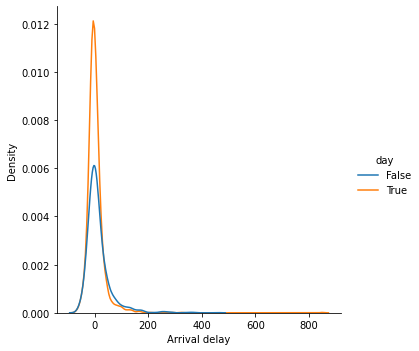

In [ ]:
#density plot
sns.displot(df_flights, x='arr_delay', kind='kde', hue='day', fill=False).set(xlabel='Arrival delay')

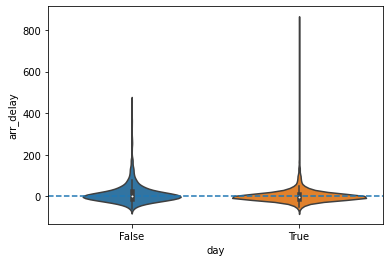

In [ ]:
#plot a violin plot
sns.violinplot(data=df_flights, x='day',y='arr_delay')
plt.axhline(0, ls='--') #add a dashed line at zero

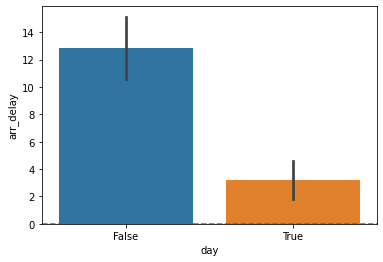

In [ ]:
#bar plot
sns.barplot(data=df_flights, x="day", y="arr_delay" )
plt.axhline(0, ls='--') #add a dashed line at zero

Post to slack and see if your results rought corespond to what others have found? How sensitive are your results to the choice of times for day/night?